### **Introduction**

Chronic respiratory diseases (CRDs) represent a significant public health challenge globally, affecting millions of individuals with conditions such as chronic obstructive pulmonary disease (COPD), asthma, bronchiectasis, and interstitial lung diseases. These diseases are characterized by persistent respiratory symptoms, including coughing, shortness of breath, and wheezing, which severely impact the quality of life and productivity of individuals.



Despite ongoing research, the burden of CRDs continues to rise, influenced by factors such as aging populations, environmental changes, and increased urbanization. Previous studies have highlighted the role of genetic, environmental, and occupational factors in the development and exacerbation of these conditions. For instance, exposure to air pollution, smoking, occupational hazards, and allergens are well-documented risk factors for CRDs. Genetic predispositions also play a significant role, with variations in susceptibility observed across different populations.

Significant research has focused on the prevalence and impact of CRDs at national and global levels. For example, the Global Burden of Disease Study provides extensive data on the incidence and mortality of CRDs worldwide, emphasizing the substantial health and economic impacts. However, these studies often aggregate data at broad geographic levels, potentially overlooking significant disparities within smaller regions.


Understanding the localized patterns of CRD burden is crucial for several reasons. First, environmental and social determinants of health can vary significantly between regions, affecting disease prevalence and outcomes. Second, local healthcare infrastructure and access to medical services can influence disease management and mortality rates. Therefore, analyzing CRD mortality at the county level can provide valuable insights into the spatial distribution of disease burden and the underlying factors contributing to these disparities.


**Problem Statement: This project aims to investigate the patterns and correlates of CRD mortality across various counties. By analyzing these patterns, we intend to improve our understanding of the disease burden, identify predominant risk factors, and assess outcomes in different locales. This research will contribute to filling the gap in knowledge regarding local disparities and aid in crafting more effective public health strategies.**


---

### **Data Description**

A description of the datasets that you will use to address your Problem Statement.  This description **MUST** includes links to the data and for **each** data set should include:

- Owner of the data
- How the data was collected
- Time range and/or spatial range that the data covers
- Data dictionary matching field/column names to understandable text
- How the data relates to the Problem Statement

Roughly 500 words.

---

1. United States Chronic Respiratory Disease Mortality Rates by County 1980-2014 by IMHE.

Link to the dataset [Institute for Health Metrics and Evaluation (IHME) Dataset](https://ghdx.healthdata.org/record/ihme-data/united-states-chronic-respiratory-disease-mortality-rates-county-1980-2014)

IHME research produced estimates for age-standardized mortality rates by county from chronic respiratory diseases. The estimates were generated using de-identified death records from the National Center for Health Statistics (NCHS); population counts from the U.S. Census Bureau, NCHS, and the Human Mortality Database; the cause list from the Global Burden of Disease Study (GBD); and the application of small area estimation models.

This dataset provides estimates for age-standardized mortality rates by disease type and sex at the county level for each state, the District of Columbia, and the United States as a whole for 1980-2014.

Study results were published in JAMA in September 2017 in "Trends and patterns of differences in chronic respiratory disease mortality among US counties, 1980–2014.

Location - County, State

FIPS - Code of the state or county

Mortality Rate, 1980 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 1985 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 1990 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 1995 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 2000 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 2005 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 2010 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Mortality Rate, 2014 -Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.

Since the project aims to investigate the patterns and correlates of chronic respiratory diseases(CRDs) Deaths over Counties, CRD deaths Time series is important to investigate Deaths over time.

2. [Tiger Line Shape Files](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

This is the Geopanda of the County (2016) used to visualize the CRD Deaths in Map.

Name : Tiger Line Shapefiles

Data Source : The United States Census Bureau provides the Tiger Line Shapefiles.

The key attributes in the dataset are:

geometry: Contains geometric shapes representing the boundaries of counties.
Each geometry represents a polygon outlining the county's boundary on a map.

GEOID: A concatenation of the state and county FIPS codes, forming a unique identifier for each county.

It is used to visualize counties over CRD Deaths on maps.

3. [Census Data](https://data.census.gov/table/ACSST5Y2014.S1903?q=median%20income%202014&g=010XX00US$0500000)

This is 2014 population census data.

Name : MEDIAN INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS)
Data Source : U.S. Census Bureau, 2014 American Community Survey 1-Year Estimates.

It is used to get median household income of the counties.

The key attributes in the dataset are:

Geography: GEOID

Median income (dollars)!!Estimate!!Households: Median income of Households in Dollars.


4. [Population Dataset 2014](https://data.census.gov/table/ACSST1Y2014.S0101?q=population%202014&g=010XX00US$0500000)

This is 2014 population census data.

Name :AGE AND SEX Population(2014)

Data Source : American Community Survey (ACS).

It is used to get population of the counties.

The key attributes in the dataset are:

Geography: GEOID

Total!!Estimate!!Total population: Total population of the county in 2014.


### **Summary Statistics and Visualizations**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

Load CRD Dataset

In [ ]:
fp = "/content/drive/MyDrive/IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014_NATIONAL_Y2017M09D26.XLSX"
chronic = pd.read_excel(fp, skiprows=1)
chronic

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
0,United States,NaN,"40.79 (39.80, 41.77)","42.99 (42.10, 43.90)","44.94 (44.08, 45.93)","50.07 (48.98, 51.23)","54.56 (53.34, 55.74)","54.58 (53.39, 55.85)","52.92 (51.72, 54.16)","52.92 (51.60, 54.36)","29.73 (25.47, 33.83)"
1,Alabama,1.0,"42.43 (41.22, 43.60)","46.29 (45.24, 47.34)","49.95 (48.86, 51.12)","57.00 (55.78, 58.36)","65.65 (64.23, 67.09)","69.21 (67.66, 70.75)","70.86 (69.27, 72.46)","73.44 (71.54, 75.49)","73.08 (67.09, 79.45)"
2,"Autauga County, Alabama",1001.0,"46.56 (42.86, 50.68)","50.68 (47.16, 54.42)","55.55 (52.19, 59.07)","63.21 (59.85, 66.62)","71.77 (68.27, 75.56)","77.13 (73.44, 81.17)","77.75 (73.63, 81.85)","81.79 (77.37, 86.77)","75.67 (58.34, 95.40)"
3,"Baldwin County, Alabama",1003.0,"37.15 (34.89, 39.40)","39.46 (37.38, 41.68)","42.97 (40.88, 45.19)","48.15 (46.05, 50.62)","52.07 (49.85, 54.48)","52.56 (50.47, 54.77)","55.12 (52.87, 57.56)","54.28 (51.92, 56.65)","46.10 (35.48, 59.57)"
4,"Barbour County, Alabama",1005.0,"42.84 (39.76, 46.26)","46.78 (43.78, 50.05)","50.05 (47.18, 53.20)","57.07 (54.07, 60.08)","65.19 (61.87, 68.69)","66.93 (63.11, 70.52)","67.52 (63.26, 71.55)","69.82 (65.35, 74.56)","62.98 (47.20, 80.68)"
...,...,...,...,...,...,...,...,...,...,...,...
3191,"Uinta County, Wyoming",56041.0,"57.57 (52.19, 63.54)","58.47 (53.93, 63.41)","60.67 (56.51, 65.07)","69.25 (65.25, 73.71)","77.74 (73.01, 82.62)","80.42 (75.38, 85.52)","79.49 (74.05, 84.93)","81.51 (75.41, 87.51)","41.57 (23.92, 61.69)"
3192,"Washakie County, Wyoming",56043.0,"51.20 (46.79, 55.82)","52.67 (48.57, 56.84)","54.01 (50.40, 57.86)","58.99 (55.35, 62.90)","64.44 (60.32, 68.79)","63.50 (59.01, 67.74)","59.57 (55.40, 64.17)","59.36 (54.71, 64.38)","15.92 (1.90, 32.04)"
3193,"Weston County, Wyoming",56045.0,"67.66 (61.43, 74.17)","68.27 (63.05, 73.61)","68.94 (63.93, 73.67)","76.43 (71.63, 81.45)","83.64 (78.48, 89.36)","85.91 (80.65, 91.88)","81.11 (75.64, 87.37)","81.68 (75.06, 88.75)","20.73 (7.64, 36.59)"
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data has National and state values. These have to be removed Since only counties are required

In [ ]:
temp = chronic[:]
data = temp[temp['FIPS']>100]
data

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
2,"Autauga County, Alabama",1001.0,"46.56 (42.86, 50.68)","50.68 (47.16, 54.42)","55.55 (52.19, 59.07)","63.21 (59.85, 66.62)","71.77 (68.27, 75.56)","77.13 (73.44, 81.17)","77.75 (73.63, 81.85)","81.79 (77.37, 86.77)","75.67 (58.34, 95.40)"
3,"Baldwin County, Alabama",1003.0,"37.15 (34.89, 39.40)","39.46 (37.38, 41.68)","42.97 (40.88, 45.19)","48.15 (46.05, 50.62)","52.07 (49.85, 54.48)","52.56 (50.47, 54.77)","55.12 (52.87, 57.56)","54.28 (51.92, 56.65)","46.10 (35.48, 59.57)"
4,"Barbour County, Alabama",1005.0,"42.84 (39.76, 46.26)","46.78 (43.78, 50.05)","50.05 (47.18, 53.20)","57.07 (54.07, 60.08)","65.19 (61.87, 68.69)","66.93 (63.11, 70.52)","67.52 (63.26, 71.55)","69.82 (65.35, 74.56)","62.98 (47.20, 80.68)"
5,"Bibb County, Alabama",1007.0,"46.14 (42.19, 50.25)","51.21 (47.49, 55.26)","56.24 (52.68, 59.96)","65.08 (61.25, 69.46)","74.13 (69.86, 78.72)","76.93 (72.79, 81.34)","80.51 (75.82, 85.85)","84.49 (78.58, 90.47)","83.11 (62.21, 105.79)"
6,"Blount County, Alabama",1009.0,"43.68 (40.39, 46.99)","47.93 (44.95, 51.00)","52.70 (49.58, 55.60)","62.08 (58.87, 65.25)","71.95 (68.40, 75.50)","77.68 (73.99, 81.36)","80.48 (76.67, 84.46)","87.05 (82.51, 91.87)","99.30 (80.27, 120.26)"
...,...,...,...,...,...,...,...,...,...,...,...
3189,"Sweetwater County, Wyoming",56037.0,"61.09 (56.69, 65.83)","61.79 (58.05, 66.09)","63.44 (60.04, 67.35)","72.05 (68.38, 75.78)","77.80 (73.94, 82.10)","77.62 (73.76, 81.80)","76.19 (72.01, 80.43)","78.01 (73.42, 82.99)","27.71 (15.47, 41.04)"
3190,"Teton County, Wyoming",56039.0,"46.45 (41.39, 51.61)","45.69 (41.60, 50.18)","44.26 (40.55, 48.10)","45.40 (41.94, 49.26)","46.28 (42.93, 50.02)","42.07 (39.01, 45.30)","38.44 (35.41, 41.48)","36.09 (33.07, 39.69)","-22.30 (-31.88, -10.77)"
3191,"Uinta County, Wyoming",56041.0,"57.57 (52.19, 63.54)","58.47 (53.93, 63.41)","60.67 (56.51, 65.07)","69.25 (65.25, 73.71)","77.74 (73.01, 82.62)","80.42 (75.38, 85.52)","79.49 (74.05, 84.93)","81.51 (75.41, 87.51)","41.57 (23.92, 61.69)"
3192,"Washakie County, Wyoming",56043.0,"51.20 (46.79, 55.82)","52.67 (48.57, 56.84)","54.01 (50.40, 57.86)","58.99 (55.35, 62.90)","64.44 (60.32, 68.79)","63.50 (59.01, 67.74)","59.57 (55.40, 64.17)","59.36 (54.71, 64.38)","15.92 (1.90, 32.04)"


Trimming County names

In [ ]:
data['Location'] = data['Location'].str.split(',').str[0]
data['Location'] = data['Location'].str.replace(' County', '')

<ipython-input-87-ab449a627cb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-ab449a627cb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Adding Common Column between TWO Datasets

In [ ]:
data['FIPS'] = data['FIPS'].astype(int).astype(str)
data['gid'] = data['FIPS'].astype(int).astype(str).str.zfill(5)

<ipython-input-88-08218106b545>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-08218106b545>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FIPS Column, % change in Mortality Rate columns are removed and Location is set as index.

In [ ]:
df = data.drop(columns=['FIPS', 'gid'])

cols = df.columns[:-1]
df = df[cols]

df.set_index("Location", inplace = True)

df

,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*"
Location,,,,,,,,
Autauga,"46.56 (42.86, 50.68)","50.68 (47.16, 54.42)","55.55 (52.19, 59.07)","63.21 (59.85, 66.62)","71.77 (68.27, 75.56)","77.13 (73.44, 81.17)","77.75 (73.63, 81.85)","81.79 (77.37, 86.77)"
Baldwin,"37.15 (34.89, 39.40)","39.46 (37.38, 41.68)","42.97 (40.88, 45.19)","48.15 (46.05, 50.62)","52.07 (49.85, 54.48)","52.56 (50.47, 54.77)","55.12 (52.87, 57.56)","54.28 (51.92, 56.65)"
Barbour,"42.84 (39.76, 46.26)","46.78 (43.78, 50.05)","50.05 (47.18, 53.20)","57.07 (54.07, 60.08)","65.19 (61.87, 68.69)","66.93 (63.11, 70.52)","67.52 (63.26, 71.55)","69.82 (65.35, 74.56)"
Bibb,"46.14 (42.19, 50.25)","51.21 (47.49, 55.26)","56.24 (52.68, 59.96)","65.08 (61.25, 69.46)","74.13 (69.86, 78.72)","76.93 (72.79, 81.34)","80.51 (75.82, 85.85)","84.49 (78.58, 90.47)"
Blount,"43.68 (40.39, 46.99)","47.93 (44.95, 51.00)","52.70 (49.58, 55.60)","62.08 (58.87, 65.25)","71.95 (68.40, 75.50)","77.68 (73.99, 81.36)","80.48 (76.67, 84.46)","87.05 (82.51, 91.87)"
...,...,...,...,...,...,...,...,...
Sweetwater,"61.09 (56.69, 65.83)","61.79 (58.05, 66.09)","63.44 (60.04, 67.35)","72.05 (68.38, 75.78)","77.80 (73.94, 82.10)","77.62 (73.76, 81.80)","76.19 (72.01, 80.43)","78.01 (73.42, 82.99)"
Teton,"46.45 (41.39, 51.61)","45.69 (41.60, 50.18)","44.26 (40.55, 48.10)","45.40 (41.94, 49.26)","46.28 (42.93, 50.02)","42.07 (39.01, 45.30)","38.44 (35.41, 41.48)","36.09 (33.07, 39.69)"
Uinta,"57.57 (52.19, 63.54)","58.47 (53.93, 63.41)","60.67 (56.51, 65.07)","69.25 (65.25, 73.71)","77.74 (73.01, 82.62)","80.42 (75.38, 85.52)","79.49 (74.05, 84.93)","81.51 (75.41, 87.51)"


All the Columns are to be renamed to Year of type int

In [ ]:
years = [int(col.split(", ")[1][:-1]) for col in df.columns]

# Create a mapping dictionary for renaming columns
new_column_names = {old_col: year for old_col, year in zip(df.columns, years)}

# Rename columns
df = df.rename(columns=new_column_names)

df

,1980,1985,1990,1995,2000,2005,2010,2014
Location,,,,,,,,
Autauga,"46.56 (42.86, 50.68)","50.68 (47.16, 54.42)","55.55 (52.19, 59.07)","63.21 (59.85, 66.62)","71.77 (68.27, 75.56)","77.13 (73.44, 81.17)","77.75 (73.63, 81.85)","81.79 (77.37, 86.77)"
Baldwin,"37.15 (34.89, 39.40)","39.46 (37.38, 41.68)","42.97 (40.88, 45.19)","48.15 (46.05, 50.62)","52.07 (49.85, 54.48)","52.56 (50.47, 54.77)","55.12 (52.87, 57.56)","54.28 (51.92, 56.65)"
Barbour,"42.84 (39.76, 46.26)","46.78 (43.78, 50.05)","50.05 (47.18, 53.20)","57.07 (54.07, 60.08)","65.19 (61.87, 68.69)","66.93 (63.11, 70.52)","67.52 (63.26, 71.55)","69.82 (65.35, 74.56)"
Bibb,"46.14 (42.19, 50.25)","51.21 (47.49, 55.26)","56.24 (52.68, 59.96)","65.08 (61.25, 69.46)","74.13 (69.86, 78.72)","76.93 (72.79, 81.34)","80.51 (75.82, 85.85)","84.49 (78.58, 90.47)"
Blount,"43.68 (40.39, 46.99)","47.93 (44.95, 51.00)","52.70 (49.58, 55.60)","62.08 (58.87, 65.25)","71.95 (68.40, 75.50)","77.68 (73.99, 81.36)","80.48 (76.67, 84.46)","87.05 (82.51, 91.87)"
...,...,...,...,...,...,...,...,...
Sweetwater,"61.09 (56.69, 65.83)","61.79 (58.05, 66.09)","63.44 (60.04, 67.35)","72.05 (68.38, 75.78)","77.80 (73.94, 82.10)","77.62 (73.76, 81.80)","76.19 (72.01, 80.43)","78.01 (73.42, 82.99)"
Teton,"46.45 (41.39, 51.61)","45.69 (41.60, 50.18)","44.26 (40.55, 48.10)","45.40 (41.94, 49.26)","46.28 (42.93, 50.02)","42.07 (39.01, 45.30)","38.44 (35.41, 41.48)","36.09 (33.07, 39.69)"
Uinta,"57.57 (52.19, 63.54)","58.47 (53.93, 63.41)","60.67 (56.51, 65.07)","69.25 (65.25, 73.71)","77.74 (73.01, 82.62)","80.42 (75.38, 85.52)","79.49 (74.05, 84.93)","81.51 (75.41, 87.51)"


Only Deaths are extracted from every cell(Removed 95% Uncertainty levels) and converted to float values.

In [ ]:
def extract_first_value(value):
    return float(value.split()[0])

# Apply the function to all cells in the DataFrame
df = df.applymap(extract_first_value)

df

,1980,1985,1990,1995,2000,2005,2010,2014
Location,,,,,,,,
Autauga,46.56,50.68,55.55,63.21,71.77,77.13,77.75,81.79
Baldwin,37.15,39.46,42.97,48.15,52.07,52.56,55.12,54.28
Barbour,42.84,46.78,50.05,57.07,65.19,66.93,67.52,69.82
Bibb,46.14,51.21,56.24,65.08,74.13,76.93,80.51,84.49
Blount,43.68,47.93,52.70,62.08,71.95,77.68,80.48,87.05
...,...,...,...,...,...,...,...,...
Sweetwater,61.09,61.79,63.44,72.05,77.80,77.62,76.19,78.01
Teton,46.45,45.69,44.26,45.40,46.28,42.07,38.44,36.09
Uinta,57.57,58.47,60.67,69.25,77.74,80.42,79.49,81.51


Plotting 2 Counties to visualize the Nature of Deaths in Time Series so that we can have basic idea of time series.

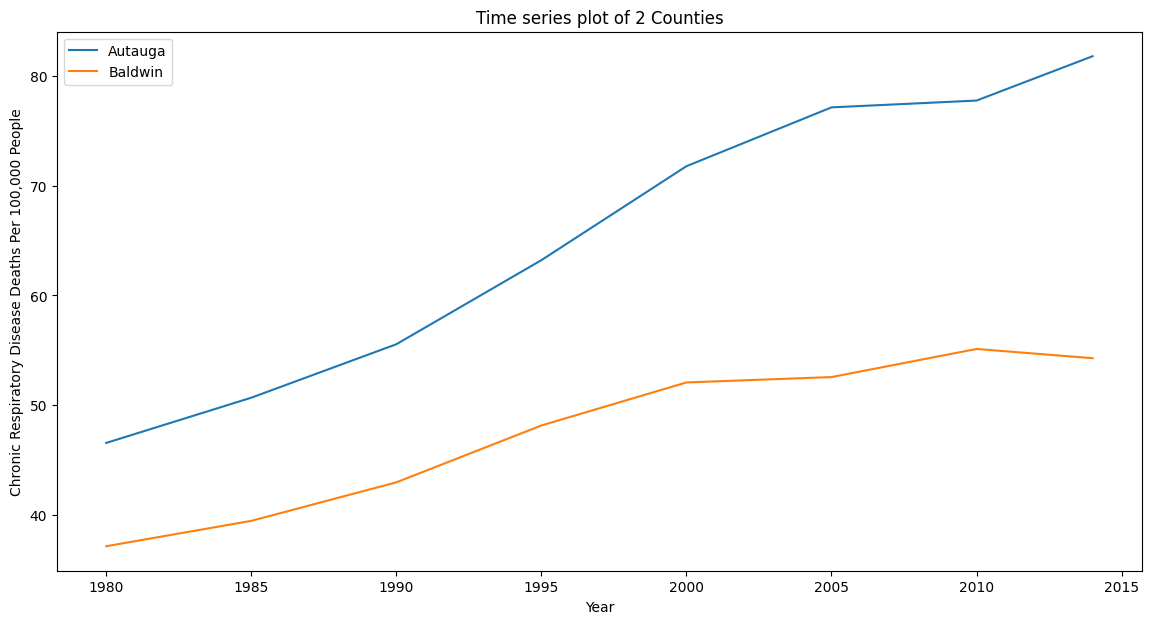

In [ ]:
# -- plot a couple of countries
ax = df.iloc[0].plot(figsize=(14, 7))
ax = df.iloc[1].plot(ax=ax)
ax.set_title('Time series plot of 2 Counties')
ax.set_xlabel("Year")
ax.set_ylabel("Chronic Respiratory Disease Deaths Per 100,000 People")
ax.legend()

# -- get the figure and show it
ax.get_figure().show()

We can see they both have similar trend till 2000 and changed after. Notable difference in magnitude is visible.

Plotting All Counties to understand the range(clusters) of TimeSeries Plot to visualize any Patterns or Clusters.

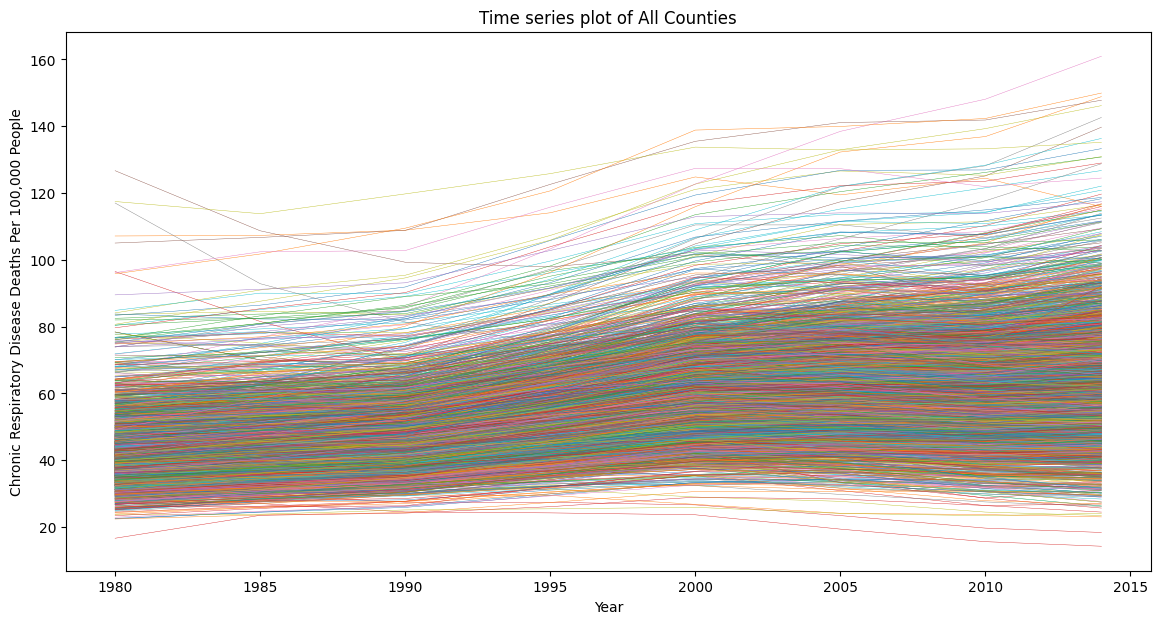

In [ ]:
# -- plot them all
ax = df.T.plot(legend=False, lw=0.3, figsize=(14, 7))
ax.set_xlabel("Year")
ax.set_ylabel("Chronic Respiratory Disease Deaths Per 100,000 People")
ax.set_title('Time series plot of All Counties')

# -- get the figure and show it
ax.get_figure().show()

We might observe most of them have similar trend till 2000 and after that we may observe some goes upward trend and other downwards. We may utilize k-mean clustering to explore further.

HeatMap of CRD Death to visualize any patterns.

In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(df, color_continuous_scale="viridis", labels={"color" :"CRD Deaths Per 100,000 People"}, width = 1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)
fig.update_layout(title='Heat Map of CRD Deaths',
        xaxis_title="Year",
        yaxis_title='County')

fig.show()

The above HeatMap is unclear, we can see few Counties Dominated other. So standardizing them may give better results.

Standardizing the Data.

In [ ]:
df_st = df.sub(df.mean(axis=1), axis=0).divide(df.std(axis=1), axis=0)
df_st

,1980,1985,1990,1995,2000,2005,2010,2014
Location,,,,,,,,
Autauga,-1.408791,-1.103226,-0.742035,-0.173920,0.460944,0.858476,0.904460,1.204092
Baldwin,-1.510349,-1.180273,-0.678728,0.061443,0.621572,0.691588,1.057387,0.937359
Barbour,-1.461306,-1.088287,-0.778701,-0.114083,0.654677,0.819411,0.875269,1.093021
Bibb,-1.442530,-1.089236,-0.738730,-0.122730,0.507904,0.703017,0.952483,1.229822
Blount,-1.342708,-1.080506,-0.786222,-0.207526,0.401401,0.754912,0.927657,1.332991
...,...,...,...,...,...,...,...,...
Sweetwater,-1.298799,-1.207046,-0.990771,0.137794,0.891481,0.867887,0.680448,0.919006
Teton,0.862321,0.667562,0.301108,0.593246,0.818756,-0.260106,-1.190336,-1.792551
Uinta,-1.252039,-1.165824,-0.955075,-0.133155,0.680144,0.936874,0.847785,1.041291


HeatMap of Standardized Data

In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(df_st, color_continuous_scale="viridis", labels={"color" :"CRD Deaths Standardized"}, width = 1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.update_layout(title='Heat Map of Standardized CRD Deaths',
        xaxis_title="Year",
        yaxis_title='County')

fig.show()

This is better and can observe some patterns. So Clustering them can help us to explore more.

Loading County Data

In [ ]:
path = "/content/drive/MyDrive/tl_2016_us_county/tl_2016_us_county.shp"
co = gpd.read_file(path)
co

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477895811,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016761713,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169240199,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103983377,12186837,+34.6904951,-084.4546507,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329460632,16924718,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850058790,71143948,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707..."
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039139,8841781,+32.3034712,-101.4387720,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


Ploting the Counties

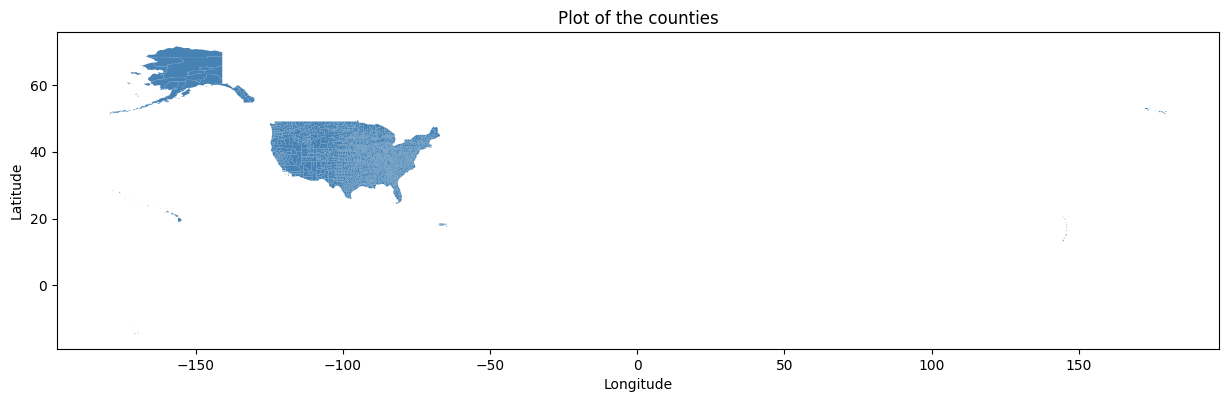

In [ ]:
# -- make a plot of the shapes
ax = co.plot(color="steelblue", figsize=(15,5))
ax.set_title("Plot of the counties")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(False)

Loading Income Data

In [ ]:
fp = "/content/drive/MyDrive/Income_2014.csv"
census = pd.read_csv(fp, skiprows=1)
census

,Geography,Geographic Area Name,Total!!Estimate!!Households,Total!!Margin of Error!!Households,Median income (dollars)!!Estimate!!Households,Median income (dollars)!!Margin of Error!!Households,Total!!Estimate!!Households!!One race!!White,Total!!Margin of Error!!Households!!One race!!White,Median income (dollars)!!Estimate!!Households!!One race!!White,Median income (dollars)!!Margin of Error!!Households!!One race!!White,...,Median income (dollars)!!Margin of Error!!PERCENT IMPUTED!!Household income in the past 12 months,Total!!Estimate!!PERCENT IMPUTED!!Family income in the past 12 months,Total!!Margin of Error!!PERCENT IMPUTED!!Family income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT IMPUTED!!Family income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT IMPUTED!!Family income in the past 12 months,Total!!Estimate!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Total!!Margin of Error!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Median income (dollars)!!Estimate!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Median income (dollars)!!Margin of Error!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Unnamed: 122
0,0500000US01001,"Autauga County, Alabama",20304,458,52475,2760,80.9,1.2,57146,3505,...,(X),25.6,(X),(X),(X),23.6,(X),(X),(X),NaN
1,0500000US01003,"Baldwin County, Alabama",73058,1241,50183,1378,89.4,0.6,52365,1597,...,(X),29.9,(X),(X),(X),25.6,(X),(X),(X),NaN
2,0500000US01005,"Barbour County, Alabama",9145,311,35634,2440,53.5,1.8,46208,4258,...,(X),42.3,(X),(X),(X),27.3,(X),(X),(X),NaN
3,0500000US01007,"Bibb County, Alabama",7078,390,37984,3295,82.4,2.5,41269,2530,...,(X),39.7,(X),(X),(X),31.8,(X),(X),(X),NaN
4,0500000US01009,"Blount County, Alabama",20934,399,44409,2225,96.5,0.6,45265,2445,...,(X),27.9,(X),(X),(X),22.8,(X),(X),(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0500000US72145,"Vega Baja Municipio, Puerto Rico",17282,506,16625,837,91.8,1.4,16102,872,...,(X),48.5,(X),(X),(X),36.0,(X),(X),(X),NaN
3216,0500000US72147,"Vieques Municipio, Puerto Rico",2755,227,18179,3241,53.1,6.9,18468,3540,...,(X),14.1,(X),(X),(X),16.2,(X),(X),(X),NaN
3217,0500000US72149,"Villalba Municipio, Puerto Rico",7924,242,17389,1187,59.5,3.4,20499,2226,...,(X),30.1,(X),(X),(X),16.7,(X),(X),(X),NaN
3218,0500000US72151,"Yabucoa Municipio, Puerto Rico",12073,384,16627,1522,70.0,3.0,16018,2213,...,(X),26.2,(X),(X),(X),13.3,(X),(X),(X),NaN


Retaining required Columns and Converting GID so that it can be merged.

In [ ]:
# Retain only the specified columns
census = census[['Geography', 'Geographic Area Name', 'Median income (dollars)!!Estimate!!Households']]

# Rename the columns
census.columns = ['Geography', 'Name', 'Income']

census['GID'] = census['Geography'].str[-5:]

census

<ipython-input-100-243555cb3a0e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Geography,Name,Income,GID
0,0500000US01001,"Autauga County, Alabama",52475,01001
1,0500000US01003,"Baldwin County, Alabama",50183,01003
2,0500000US01005,"Barbour County, Alabama",35634,01005
3,0500000US01007,"Bibb County, Alabama",37984,01007
4,0500000US01009,"Blount County, Alabama",44409,01009
...,...,...,...,...
3215,0500000US72145,"Vega Baja Municipio, Puerto Rico",16625,72145
3216,0500000US72147,"Vieques Municipio, Puerto Rico",18179,72147
3217,0500000US72149,"Villalba Municipio, Puerto Rico",17389,72149
3218,0500000US72151,"Yabucoa Municipio, Puerto Rico",16627,72151


Histogram of Income

<ipython-input-101-79958e1321b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



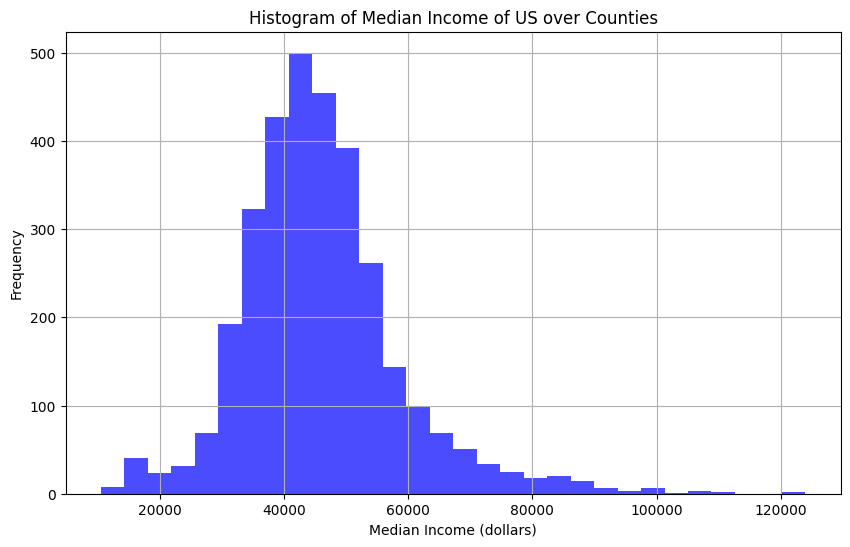

In [ ]:
census['Income'] = pd.to_numeric(census['Income'], errors='coerce')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(census['Income'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Median Income of US over Counties')
plt.xlabel('Median Income (dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram plot indicates a generally normal distribution of median income across US counties, with most data concentrated around the central range. There are no extreme outliers, suggesting uniform economic conditions across the majority of counties. The slight right skew indicates that some counties have higher incomes, but these do not appear as distinct outliers in the overall distribution.

Merge income with County Dataset to visualize Income

In [ ]:
geo_income = co.merge(census, left_on='GEOID', right_on='GID')
geo_income

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Name,Income,GID
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,A,1477895811,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",0500000US31039,"Cuming County, Nebraska",49872,31039
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",0500000US53069,"Wahkiakum County, Washington",44500,53069
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,A,6016761713,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",0500000US35011,"De Baca County, New Mexico",37961,35011
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,A,2169240199,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",0500000US31109,"Lancaster County, Nebraska",51916,31109
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",0500000US31129,"Nuckolls County, Nebraska",42404,31129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,...,A,1103983377,12186837,+34.6904951,-084.4546507,"POLYGON ((-84.65478 34.66559, -84.65488 34.669...",0500000US13123,"Gilmer County, Georgia",39581,13123
3214,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,...,A,4329460632,16924718,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813...",0500000US27135,"Roseau County, Minnesota",52256,27135
3215,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,...,A,1850058790,71143948,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707...",0500000US28089,"Madison County, Mississippi",63156,28089
3216,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,...,A,2333039139,8841781,+32.3034712,-101.4387720,"POLYGON ((-101.69227 32.27106, -101.69221 32.2...",0500000US48227,"Howard County, Texas",47994,48227


Visualizing Median Income Distribution on Map

Text(0.5, 1.0, 'Median Income Distribution')

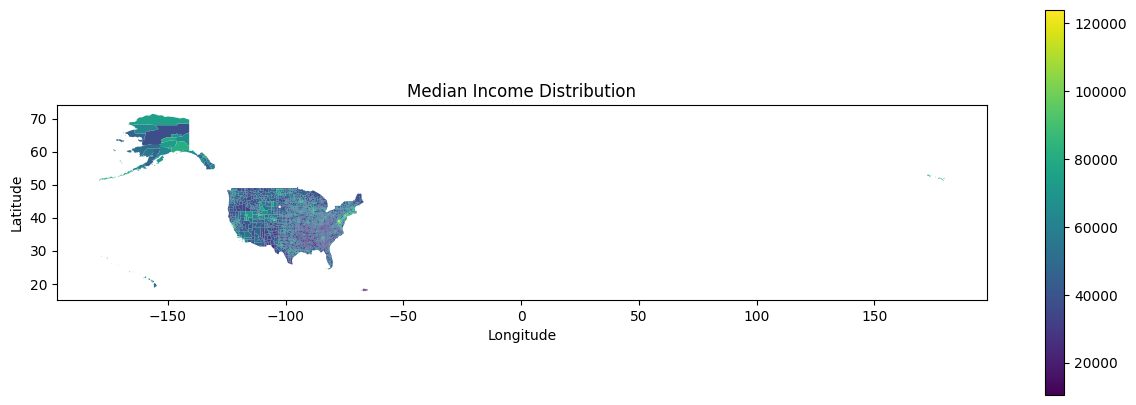

In [ ]:
ax = geo_income.plot("Income",  figsize=(15,5), legend= True)
ax.grid(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Median Income Distribution')

Removing Right Most Islands for better Plot

In [ ]:
filtered_df = geo_income[:]
filtered_df['lon'] = filtered_df['INTPTLON'].astype(float)
filtered_df = filtered_df[filtered_df['lon'] < 0]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualizing Filtered Data

Text(0.5, 1.0, 'Median Income Distribution')

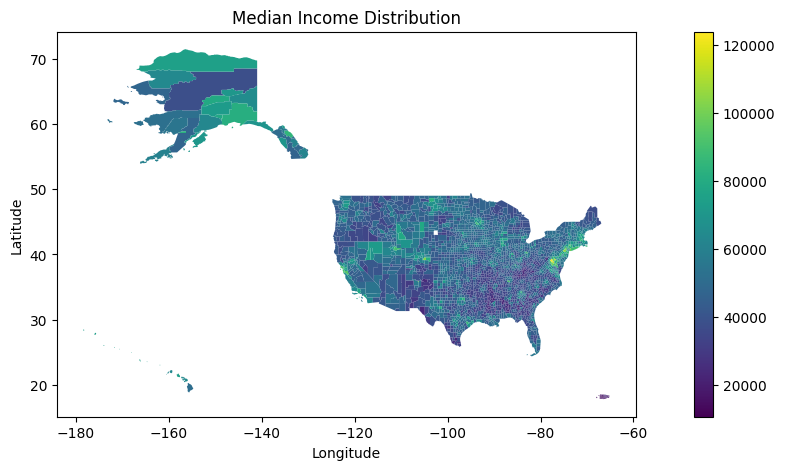

In [ ]:
# -- plot the cluster number
ax = filtered_df.plot("Income",  figsize=(15,5), legend= True)
ax.grid(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Median Income Distribution')

- **High-Income Areas**:
  - Concentrations of high median incomes (yellow regions) are visible in certain areas, particularly in parts of the Northeast, the West Coast, and some metropolitan areas in the Midwest and South.
  - States like California, Massachusetts, New York, and Washington D.C. show higher median income levels.

- **Low-Income Areas**:
  - Regions with lower median incomes (purple areas) are more dispersed but are notably present in the Southern states, parts of the Midwest, and some rural areas across the country.
  - States such as Mississippi, Arkansas, and West Virginia show lower median income levels.


  - Some states show a clear divide between urban and rural income levels. For example, Texas has high-income areas around cities like Dallas and Austin but lower incomes in its rural regions.
  - Similarly, Illinois shows higher incomes around Chicago compared to the rest of the state.


Loading Population Dataset

In [ ]:
fp = "/content/drive/MyDrive/Population_2014.csv"
census2 = pd.read_csv(fp, skiprows=1)
census2

,Geography,Geographic Area Name,Total!!Estimate!!Total population,Total!!Margin of Error!!Total population,Male!!Estimate!!Total population,Male!!Margin of Error!!Total population,Female!!Estimate!!Total population,Female!!Margin of Error!!Total population,Total!!Estimate!!AGE!!Under 5 years,Total!!Margin of Error!!AGE!!Under 5 years,...,Male!!Margin of Error!!PERCENT IMPUTED!!Sex,Female!!Estimate!!PERCENT IMPUTED!!Sex,Female!!Margin of Error!!PERCENT IMPUTED!!Sex,Total!!Estimate!!PERCENT IMPUTED!!Age,Total!!Margin of Error!!PERCENT IMPUTED!!Age,Male!!Estimate!!PERCENT IMPUTED!!Age,Male!!Margin of Error!!PERCENT IMPUTED!!Age,Female!!Estimate!!PERCENT IMPUTED!!Age,Female!!Margin of Error!!PERCENT IMPUTED!!Age,Unnamed: 218
0,0500000US01001,"Autauga County, Alabama",55136,*****,26774,129,28362,129,6.2,0.2,...,(X),(X),(X),0.7,(X),(X),(X),(X),(X),NaN
1,0500000US01003,"Baldwin County, Alabama",191205,*****,93229,242,97976,242,6.0,0.1,...,(X),(X),(X),1.3,(X),(X),(X),(X),(X),NaN
2,0500000US01005,"Barbour County, Alabama",27119,*****,14562,85,12557,85,5.9,0.1,...,(X),(X),(X),1.6,(X),(X),(X),(X),(X),NaN
3,0500000US01007,"Bibb County, Alabama",22653,*****,12220,193,10433,193,5.1,0.6,...,(X),(X),(X),7.3,(X),(X),(X),(X),(X),NaN
4,0500000US01009,"Blount County, Alabama",57645,*****,28574,111,29071,111,6.2,0.1,...,(X),(X),(X),0.8,(X),(X),(X),(X),(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0500000US72145,"Vega Baja Municipio, Puerto Rico",57915,*****,27920,*****,29995,*****,5.7,*****,...,(X),(X),(X),1.2,(X),(X),(X),(X),(X),NaN
3216,0500000US72147,"Vieques Municipio, Puerto Rico",9217,*****,4720,145,4497,145,5.5,1.7,...,(X),(X),(X),1.8,(X),(X),(X),(X),(X),NaN
3217,0500000US72149,"Villalba Municipio, Puerto Rico",25196,*****,12356,*****,12840,*****,6.2,*****,...,(X),(X),(X),0.6,(X),(X),(X),(X),(X),NaN
3218,0500000US72151,"Yabucoa Municipio, Puerto Rico",36903,*****,17984,*****,18919,*****,5.7,*****,...,(X),(X),(X),0.6,(X),(X),(X),(X),(X),NaN


Reataining only required columns and changing GID values to match for merging

In [ ]:
# Let's assume 'census' is your original DataFrame from which you're slicing
census2 = census2[['Geography', 'Total!!Estimate!!Total population']].copy()

# Renaming the columns
census2.columns = ['GID', 'Population']

# Modifying the DataFrame
census2['GID'] = census2['GID'].str[-5:]
census2['Population'] = census2['Population'].astype(int)

# Display the DataFrame
census2

,GID,Population
0,01001,55136
1,01003,191205
2,01005,27119
3,01007,22653
4,01009,57645
...,...,...
3215,72145,57915
3216,72147,9217
3217,72149,25196
3218,72151,36903


Histogram of Population

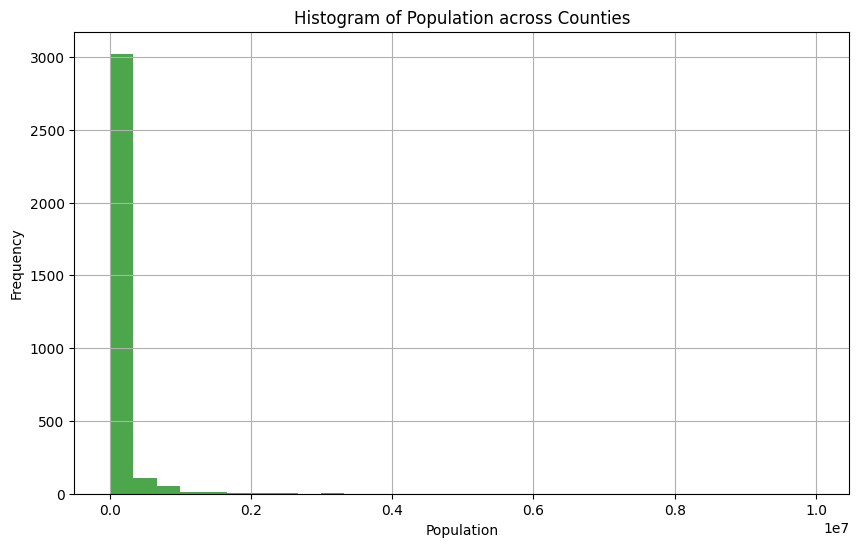

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(census2['Population'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Population across Counties')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram of population across counties shows a highly skewed distribution, with the vast majority of counties having relatively small populations and a sharp decrease in frequency as population sizes increase. This indicates that while a few counties have large populations, most are much smaller.

Merge with Geoincome

In [ ]:
geo_pop = geo_income.merge(census2, left_on='GEOID', right_on='GID')
geo_pop

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Name,Income,GID_x,GID_y,Population
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,10447360,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",0500000US31039,"Cuming County, Nebraska",49872,31039,31039,9081
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",0500000US53069,"Wahkiakum County, Washington",44500,53069,53069,4016
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,29147306,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",0500000US35011,"De Baca County, New Mexico",37961,35011,35011,1967
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,22877180,+40.7835474,-096.6886584,"POLYGON ((-96.91060 40.95841, -96.91060 40.958...",0500000US31109,"Lancaster County, Nebraska",51916,31109,31109,293726
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",0500000US31129,"Nuckolls County, Nebraska",42404,31129,31129,4431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,...,12186837,+34.6904951,-084.4546507,"POLYGON ((-84.65478 34.66559, -84.65488 34.669...",0500000US13123,"Gilmer County, Georgia",39581,13123,13123,28441
3214,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,...,16924718,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813...",0500000US27135,"Roseau County, Minnesota",52256,27135,27135,15545
3215,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,...,71143948,+32.6343703,-090.0341603,"POLYGON ((-90.09363 32.70763, -90.09360 32.707...",0500000US28089,"Madison County, Mississippi",63156,28089,28089,98622
3216,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,...,8841781,+32.3034712,-101.4387720,"POLYGON ((-101.69227 32.27106, -101.69221 32.2...",0500000US48227,"Howard County, Texas",47994,48227,48227,35702


Similarly Filter the data for better Vizualization

In [ ]:
filtered_df = geo_pop[:]
filtered_df['lon'] = filtered_df['INTPTLON'].astype(float)
filtered_df = filtered_df[filtered_df['lon'] < 0]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualize Population Distribution over Map

Text(0.5, 1.0, 'Population Distribution')

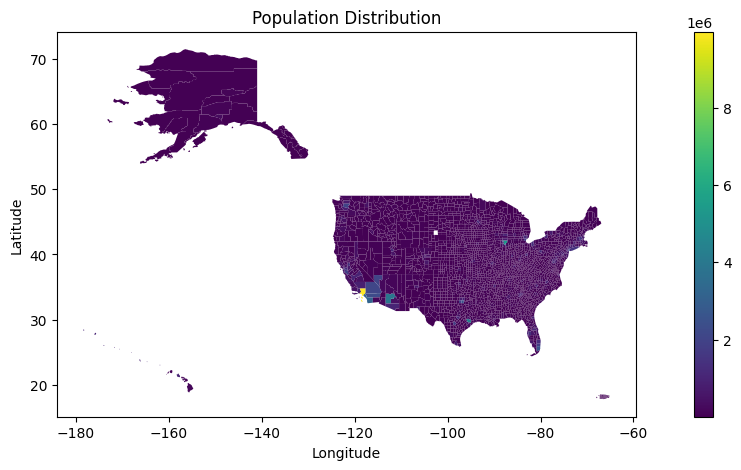

In [ ]:
# -- plot the cluster number
ax = filtered_df.plot("Population",  figsize=(15,5), legend= True)
ax.grid(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Population Distribution')

We can observe few dominating. So use some cutoff values or Transformations.

Text(0.5, 1.0, 'Population Distribution')

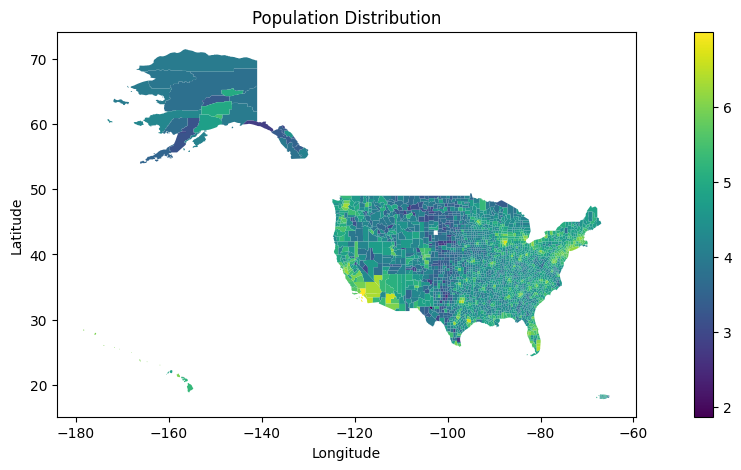

In [ ]:
# Normalize the data by logarithmic scale to prevent high values from dominating the visualization
filtered_df['normalized_population'] = np.log10(filtered_df['Population'] + 1)  # Adding 1 to avoid log10(0)

ax = filtered_df.plot("normalized_population",  figsize=(15,5), legend= True)
ax.grid(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Population Distribution')


### **Machine Learning Results**

---
---

**Grouping counties to investigate potential relationships of chronic respiratory diseases across different regions.**

Assigning Feature Dataset and performing Elbow Method to check the Cluster Count

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

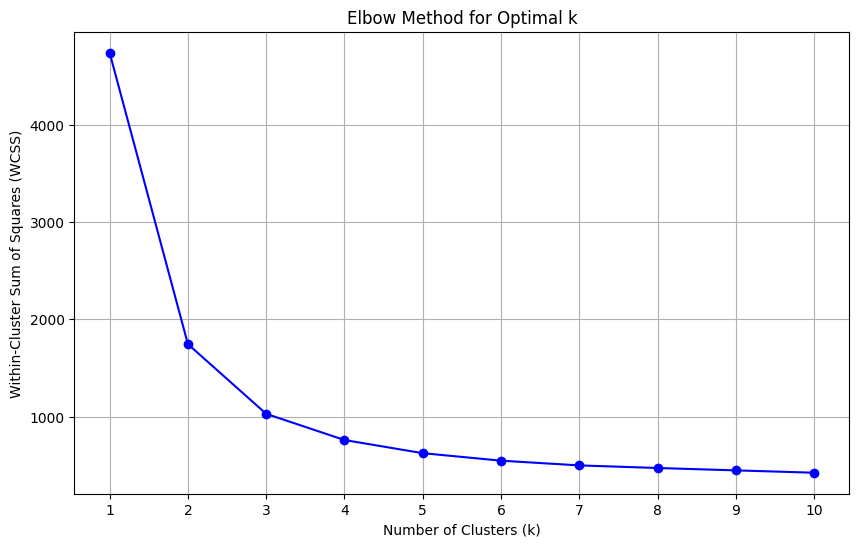

In [ ]:
feat = df_st

# Initialize list to store WCSS values
wcss = []

# Iterate over a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(feat)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


The best clusters would be 3.

Initialize Kmeans model with 3 Clusters

In [ ]:
# -- cluster with 3 clusters
km = KMeans(n_clusters=3, random_state=42)
km.fit(feat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Plotting Cluster cemter to identify the Different trends of Clusters

In [ ]:
# -- put cluster centers into a DataFrame to plot
clusters = pd.DataFrame(data=km.cluster_centers_, columns=df_st.columns)

# -- plot the cluster centers
labs = {"variable":"cluster number", "value":"CRD Deaths[yr]\n[standardized units]", "index":"Year"}
fig = px.line(clusters.T, width=900, color_discrete_sequence=px.colors.qualitative.D3, labels=labs)
fig.update_layout(title='Cluster Centers of CRD Deaths Over Time')

fig.show()

### Cluster Behavior

1. **Cluster 2**:
   - **1980-1990**: This cluster starts with a low CRD mortality rate.
   - **1990-2000**: There is a sharp increase in CRD mortality rates, peaking around the year 2000.
   - **2000-2010**: After peaking, there is a notable decline in CRD mortality rates.
   - **2010-2015**: The decline continues but at a slower rate, stabilizing around the zero mark.

2. **Cluster 0**:
   - **1980-1990**: This cluster starts with a low CRD mortality rate, similar to Cluster 2.
   - **1990-2000**: There is a gradual increase in CRD mortality rates, but the rates remain below zero.
   - **2000-2010**: The trend stabilizes with a slight increase, reaching close to the zero mark.
   - **2010-2015**: After a period of stabilization, the rates start to rise slightly.

3. **Cluster 1**:
   - **1980-1990**: This cluster begins with a CRD mortality rate close to zero.
   - **1990-2000**: There is a steady increase, reaching a peak slightly above zero.
   - **2000-2010**: A rapid decline in CRD mortality rates occurs, falling well below zero.
   - **2010-2015**: The decline continues, and by the end of the period, the CRD mortality rates are at their lowest.

### Key Insights

- **Peak and Decline**: Cluster 1 shows a significant peak in CRD mortality around 2000, followed by a notable decline. This indicates a potential period of high risk followed by successful interventions or changes in environmental factors.
- **Steady Decline**: Cluster 2 experiences a steady rise followed by a sharp decline in CRD mortality rates, suggesting effective measures taken post-2000.
- **Stable Increase**: Cluster 0 shows a more gradual and stable trend in CRD mortality rates, with less dramatic peaks and declines compared to the other clusters. But the rate is increasing gradually.


Ploting all the clusters and their counties for visualization

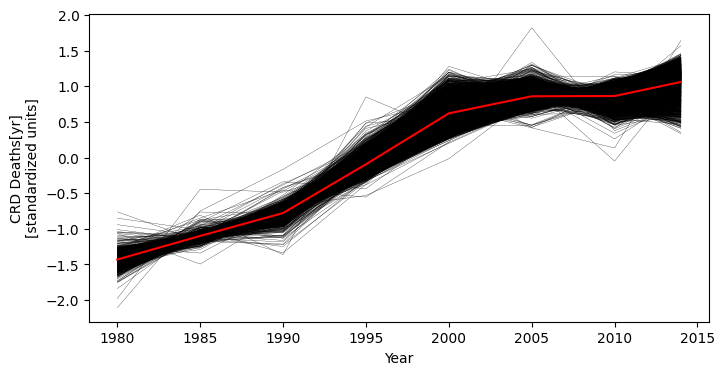

member counties  ['Autauga' 'Baldwin' 'Barbour' ... 'Sweetwater' 'Uinta' 'Weston']





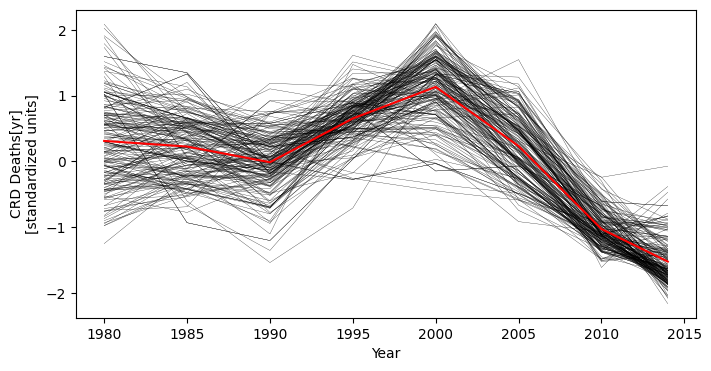

member counties  ['Aleutians East Borough' 'Aleutians West Census Area'
 'Anchorage Municipality' 'Denali Borough' 'Dillingham Census Area'
 'Hoonah-Angoon Census Area' 'Juneau City and Borough'
 'Kodiak Island Borough' 'Lake and Peninsula Borough' 'Nome Census Area'
 'North Slope Borough' 'Northwest Arctic Borough' 'Skagway Municipality'
 'Southeast Fairbanks Census Area' 'Valdez-Cordova Census Area'
 'Yakutat City and Borough' 'Yukon-Koyukuk Census Area' 'Greenlee'
 'La Paz' 'Maricopa' 'Pima' 'Pinal' 'Santa Cruz' 'Yuma' 'Alameda' 'Alpine'
 'Contra Costa' 'El Dorado' 'Imperial' 'Los Angeles' 'Marin' 'Mono'
 'Monterey' 'Orange' 'Placer' 'Sacramento' 'San Benito' 'San Diego'
 'San Francisco' 'San Luis Obispo' 'San Mateo' 'Santa Barbara'
 'Santa Clara' 'Santa Cruz' 'Solano' 'Stanislaus' 'Ventura' 'Yolo'
 'Archuleta' 'Chaffee' 'Clear Creek' 'Douglas' 'Eagle' 'Elbert' 'Garfield'
 'Gilpin' 'Grand' 'Gunnison' 'Hinsdale' 'Jackson' 'La Plata' 'Lake'
 'Larimer' 'Ouray' 'Park' 'Pitkin' 'Routt' '

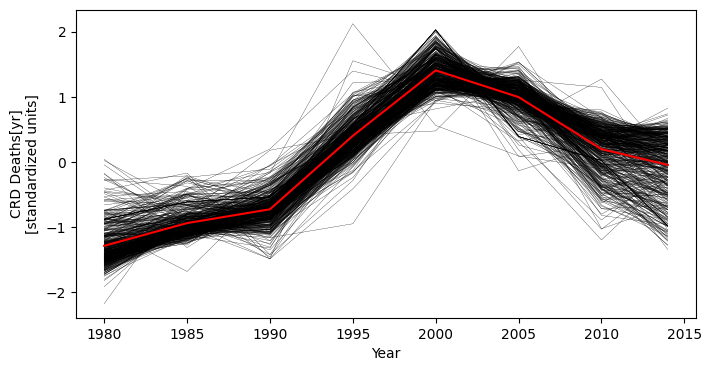

member counties  ['Shelby' 'Bethel Census Area' 'Bristol Bay Borough'
 'Fairbanks North Star Borough' 'Haines Borough' 'Kenai Peninsula Borough'
 'Ketchikan Gateway Borough' 'Kusilvak Census Area'
 'Matanuska-Susitna Borough' 'Petersburg Borough'
 'Prince of Wales-Hyder Census Area' 'Sitka City and Borough'
 'Wrangell City and Borough' 'Apache' 'Cochise' 'Coconino' 'Graham'
 'Navajo' 'Yavapai' 'Pulaski' 'Amador' 'Butte' 'Calaveras' 'Colusa'
 'Del Norte' 'Fresno' 'Glenn' 'Humboldt' 'Inyo' 'Kings' 'Lassen' 'Madera'
 'Mariposa' 'Mendocino' 'Merced' 'Napa' 'Nevada' 'Riverside'
 'San Bernardino' 'San Joaquin' 'Sierra' 'Sonoma' 'Sutter' 'Trinity'
 'Tulare' 'Tuolumne' 'Adams' 'Arapahoe' 'Boulder' 'Broomfield' 'Conejos'
 'Costilla' 'Custer' 'Delta' 'Denver' 'Dolores' 'El Paso' 'Fremont'
 'Jefferson' 'Logan' 'Mineral' 'Montrose' 'Morgan' 'Saguache' 'San Juan'
 'Weld' 'Hartford' 'Middlesex' 'New Haven' 'Tolland' 'Sussex' 'Alachua'
 'DeSoto' 'Duval' 'Glades' 'Hillsborough' 'Leon' 'Manatee' 'Miami

In [ ]:
# -- now let's plot all cluster centers, their members, and print their member names

for cnum in range(km.n_clusters):

  # -- True/False index of where labels_ is cnum
  ind = km.labels_ == cnum

  # -- get the members of that cluster number
  mems = df_st[ind]

  # -- make a plot
  ax = mems.T.plot(lw=0.2, color="k", legend=False, figsize=(8, 4))
  clusters.iloc[cnum].plot(color="r", ax=ax)
  ax.set_xlabel("Year")
  ax.set_ylabel("CRD Deaths[yr]\n[standardized units]")

  # -- refresh screen
  plt.pause(0.01)

  # -- print member counties and extra space
  print("member counties ", mems.index.values)

  print("\n\n")


Merge the Clustered Data with county data for further Visualizations

In [ ]:
data['cluster'] = km.labels_.astype(str)
data['gid'] = data['gid'].astype(str)

# Merge datasets on FIPS code
merged_data = co.merge(data, left_on='GEOID', right_on='gid')
merged_data

<ipython-input-118-408bd9272f37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-408bd9272f37>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,"Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014",gid,cluster
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,"27.88 (25.48, 30.26)","30.39 (28.12, 32.84)","35.14 (32.42, 37.79)","39.81 (36.95, 42.68)","40.82 (37.78, 43.99)","40.69 (37.34, 44.26)","41.61 (37.72, 45.78)","64.66 (43.95, 90.67)",31039,0
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,"44.19 (39.73, 48.49)","47.20 (43.17, 51.39)","51.71 (47.54, 56.03)","56.04 (51.52, 60.68)","59.50 (54.76, 64.56)","57.92 (52.65, 63.39)","57.93 (52.20, 63.95)","44.13 (25.08, 65.06)",53069,0
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,"50.48 (45.52, 55.84)","52.41 (47.56, 57.68)","58.20 (53.06, 63.73)","64.20 (58.50, 70.33)","65.00 (59.09, 71.67)","62.98 (56.50, 69.83)","63.56 (56.19, 71.44)","36.86 (18.12, 59.87)",35011,0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,"42.47 (40.58, 44.41)","46.13 (44.27, 48.09)","52.00 (49.86, 54.07)","58.95 (56.78, 61.24)","61.66 (59.28, 64.07)","62.22 (59.78, 64.98)","64.99 (62.09, 67.90)","70.86 (59.03, 82.81)",31109,0
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,"34.97 (31.88, 38.17)","38.46 (35.54, 41.64)","45.45 (42.33, 49.03)","52.29 (48.55, 56.68)","54.78 (50.50, 59.12)","57.38 (52.61, 62.18)","59.80 (54.37, 65.86)","90.65 (65.17, 121.20)",31129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,...,"43.15 (39.65, 46.92)","45.64 (42.45, 49.19)","52.20 (49.00, 55.68)","59.65 (55.98, 63.34)","63.20 (59.78, 66.95)","61.39 (57.75, 65.20)","64.34 (60.02, 68.77)","56.79 (39.41, 78.82)",13123,0
3138,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,...,"32.26 (29.36, 35.38)","32.71 (30.08, 35.55)","35.68 (33.16, 38.68)","38.79 (35.99, 41.94)","38.48 (35.57, 41.78)","37.20 (33.99, 40.52)","37.61 (34.15, 41.37)","20.39 (4.99, 39.92)",27135,0
3139,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,...,"41.85 (39.27, 44.44)","45.25 (42.75, 47.86)","53.24 (50.38, 56.24)","64.18 (61.00, 67.55)","69.40 (65.76, 72.88)","70.43 (66.82, 74.10)","73.23 (69.10, 77.48)","91.40 (74.26, 110.00)",28089,0
3140,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,...,"61.51 (58.32, 64.96)","69.92 (65.95, 73.61)","78.40 (74.83, 82.45)","92.61 (88.47, 96.85)","97.87 (93.46, 102.75)","98.74 (93.54, 103.84)","104.20 (98.35, 110.44)","85.55 (67.72, 103.58)",48227,0


Visualize the Clusters on Map

Text(0.5, 1.0, 'Visualization of Clusters')

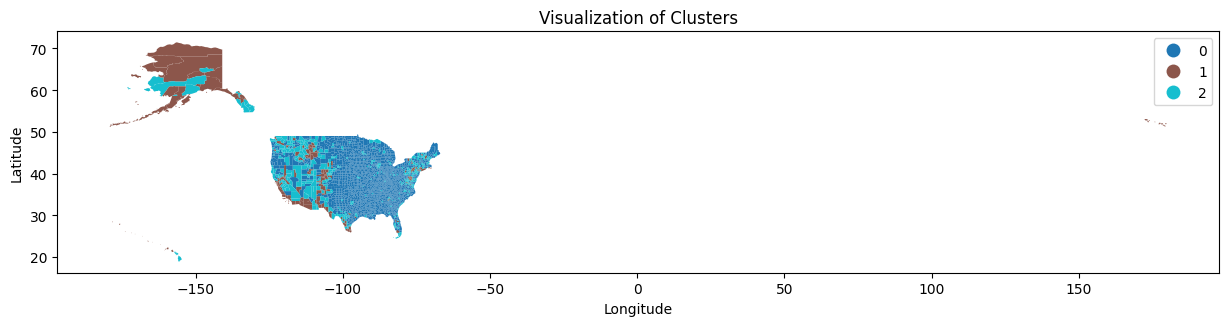

In [ ]:
# -- plot the cluster number
ax = merged_data.plot("cluster",  figsize=(15,5), legend= True)
ax.grid(False)
# Set latitude and longitude labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Visualization of Clusters')

Remove Islands

In [ ]:
filtered_df = merged_data[:]
filtered_df['lon'] = filtered_df['INTPTLON'].astype(float)
filtered_df = filtered_df[filtered_df['lon'] < 0]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualize the filtered Data

Text(0.5, 1.0, 'Visualization of Clusters')

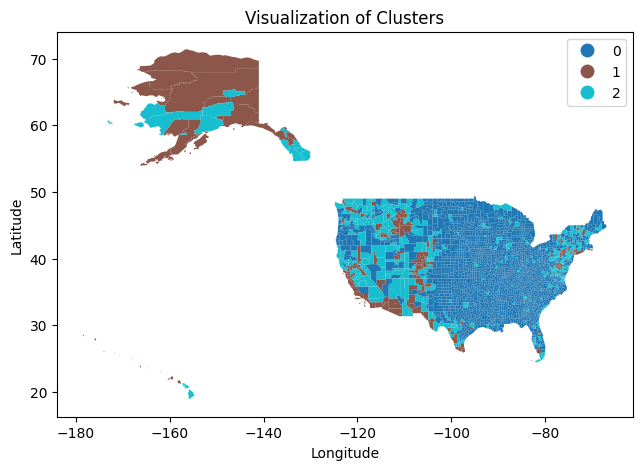

In [ ]:
# -- plot the cluster number
ax = filtered_df.plot("cluster",  figsize=(15,5), legend= True)
ax.grid(False)
# Set latitude and longitude labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Visualization of Clusters')


### Discussion of Regions in Different Clusters

#### **Cluster 0**:
- **Geographic Spread**:
  - Cluster 0 is widespread across the United States, covering a significant number of counties.
  - Predominantly found in both urban and rural areas, indicating a broad distribution.

- **Notable Areas**:
  - Urban Centers: Major metropolitan areas like parts of the Northeast (e.g., New York, Pennsylvania), the Midwest (e.g., Illinois, Ohio), and the West Coast (e.g., California, Washington).
  - Rural and Suburban Areas: Present in many rural counties, especially in the Midwest, South, and parts of the West.

- **CRD Mortality Trends**:
  - The CRD mortality rate in Cluster 0 starts below zero, peaks around the year 2000, increaing slightly till 2010 and then increasing at faster pace.

- Major technically or Industrially developed regions or metropolitan areas are present. These need to implement some programs aimed to control smoking rates and environment pollution, improving healthcare access, to stabilize the rate.

#### **Cluster 1**:
- **Geographic Spread**:
  - Cluster 1 regions are less widespread compared to Cluster 0 but are prominently visible in Alaska and some specific areas across the mainland.
  - These regions often include more remote and less populated areas.

- **Notable Areas**:
  - Alaska: Significant parts of Alaska fall under Cluster 1, indicating distinct characteristics in this region.
  - Other Regions: Scattered regions in states like New Mexico, Arizona, and some parts of the Midwest.

- **CRD Mortality Trends**:
  - CRD mortality rates in Cluster 1 begin close to zero, peak slightly above zero around 2000, and then experience a sharp decline, falling well below zero by 2015.

- Between 1990 and 2010, Alaska implemented several state programs aimed at reducing smoking rates and improving healthcare access, especially in remote areas. Environment also helps them.
- These decline in rates is one of the fruits of these programs.

#### **Cluster 2**:
- **Geographic Spread**:
  - Cluster 2 is also widely distributed but has specific concentrations in the western United States and parts of the Southeast.
  - Includes both rural and suburban areas, with some presence in urban fringes.

- **Notable Areas**:
  - Western States: Significant presence in states like Colorado, Utah, and parts of California.
  - Southeast: Some counties in states like Georgia, Florida, and South Carolina fall under this cluster.

- **CRD Mortality Trends**:
  - The CRD mortality rate for Cluster 2 starts below zero, increases gradually, peaks around 2000, and then stabilizes around the zero mark, with a slight upward trend by 2015.

- These regions are going good and have to continue the decreasing trend.

# Merging Income, population and crd data

Merge with Income data

In [ ]:
income_data = census.merge(data, left_on='GID', right_on='gid')
income_data

,Geography,Name,Income,GID,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014",gid,cluster
0,0500000US01001,"Autauga County, Alabama",52475,01001,Autauga,1001,"46.56 (42.86, 50.68)","50.68 (47.16, 54.42)","55.55 (52.19, 59.07)","63.21 (59.85, 66.62)","71.77 (68.27, 75.56)","77.13 (73.44, 81.17)","77.75 (73.63, 81.85)","81.79 (77.37, 86.77)","75.67 (58.34, 95.40)",01001,0
1,0500000US01003,"Baldwin County, Alabama",50183,01003,Baldwin,1003,"37.15 (34.89, 39.40)","39.46 (37.38, 41.68)","42.97 (40.88, 45.19)","48.15 (46.05, 50.62)","52.07 (49.85, 54.48)","52.56 (50.47, 54.77)","55.12 (52.87, 57.56)","54.28 (51.92, 56.65)","46.10 (35.48, 59.57)",01003,0
2,0500000US01005,"Barbour County, Alabama",35634,01005,Barbour,1005,"42.84 (39.76, 46.26)","46.78 (43.78, 50.05)","50.05 (47.18, 53.20)","57.07 (54.07, 60.08)","65.19 (61.87, 68.69)","66.93 (63.11, 70.52)","67.52 (63.26, 71.55)","69.82 (65.35, 74.56)","62.98 (47.20, 80.68)",01005,0
3,0500000US01007,"Bibb County, Alabama",37984,01007,Bibb,1007,"46.14 (42.19, 50.25)","51.21 (47.49, 55.26)","56.24 (52.68, 59.96)","65.08 (61.25, 69.46)","74.13 (69.86, 78.72)","76.93 (72.79, 81.34)","80.51 (75.82, 85.85)","84.49 (78.58, 90.47)","83.11 (62.21, 105.79)",01007,0
4,0500000US01009,"Blount County, Alabama",44409,01009,Blount,1009,"43.68 (40.39, 46.99)","47.93 (44.95, 51.00)","52.70 (49.58, 55.60)","62.08 (58.87, 65.25)","71.95 (68.40, 75.50)","77.68 (73.99, 81.36)","80.48 (76.67, 84.46)","87.05 (82.51, 91.87)","99.30 (80.27, 120.26)",01009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0500000US56037,"Sweetwater County, Wyoming",69448,56037,Sweetwater,56037,"61.09 (56.69, 65.83)","61.79 (58.05, 66.09)","63.44 (60.04, 67.35)","72.05 (68.38, 75.78)","77.80 (73.94, 82.10)","77.62 (73.76, 81.80)","76.19 (72.01, 80.43)","78.01 (73.42, 82.99)","27.71 (15.47, 41.04)",56037,0
3136,0500000US56039,"Teton County, Wyoming",73572,56039,Teton,56039,"46.45 (41.39, 51.61)","45.69 (41.60, 50.18)","44.26 (40.55, 48.10)","45.40 (41.94, 49.26)","46.28 (42.93, 50.02)","42.07 (39.01, 45.30)","38.44 (35.41, 41.48)","36.09 (33.07, 39.69)","-22.30 (-31.88, -10.77)",56039,1
3137,0500000US56041,"Uinta County, Wyoming",56158,56041,Uinta,56041,"57.57 (52.19, 63.54)","58.47 (53.93, 63.41)","60.67 (56.51, 65.07)","69.25 (65.25, 73.71)","77.74 (73.01, 82.62)","80.42 (75.38, 85.52)","79.49 (74.05, 84.93)","81.51 (75.41, 87.51)","41.57 (23.92, 61.69)",56041,0
3138,0500000US56043,"Washakie County, Wyoming",45696,56043,Washakie,56043,"51.20 (46.79, 55.82)","52.67 (48.57, 56.84)","54.01 (50.40, 57.86)","58.99 (55.35, 62.90)","64.44 (60.32, 68.79)","63.50 (59.01, 67.74)","59.57 (55.40, 64.17)","59.36 (54.71, 64.38)","15.92 (1.90, 32.04)",56043,2


Retain only required columns

In [ ]:
# Retain only the specified columns
income_data = income_data[['Name', 'Income', 'GID', 'Mortality Rate, 2010*', 'Mortality Rate, 2014*', 'cluster']]

# Rename the 'Mortality Rate, 2014*' column to '2014'
income_data.rename(columns={'Mortality Rate, 2014*': '2014', 'Mortality Rate, 2010*': '2010'}, inplace=True)

income_data['2014'] = income_data['2014'].str.split().str[0].astype(float)
income_data['2010'] = income_data['2010'].str.split().str[0].astype(float)

# Print the updated DataFrame to check the new '2014' values
income_data

<ipython-input-123-0b6a18a160c7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-0b6a18a160c7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-0b6a18a160c7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Income,GID,2010,2014,cluster
0,"Autauga County, Alabama",52475,01001,77.75,81.79,0
1,"Baldwin County, Alabama",50183,01003,55.12,54.28,0
2,"Barbour County, Alabama",35634,01005,67.52,69.82,0
3,"Bibb County, Alabama",37984,01007,80.51,84.49,0
4,"Blount County, Alabama",44409,01009,80.48,87.05,0
...,...,...,...,...,...,...
3135,"Sweetwater County, Wyoming",69448,56037,76.19,78.01,0
3136,"Teton County, Wyoming",73572,56039,38.44,36.09,1
3137,"Uinta County, Wyoming",56158,56041,79.49,81.51,0
3138,"Washakie County, Wyoming",45696,56043,59.57,59.36,2


Merge Population Data

In [ ]:
pop_data = census2.merge(income_data, left_on='GID', right_on='GID')
pop_data

,GID,Population,Name,Income,2010,2014,cluster
0,01001,55136,"Autauga County, Alabama",52475,77.75,81.79,0
1,01003,191205,"Baldwin County, Alabama",50183,55.12,54.28,0
2,01005,27119,"Barbour County, Alabama",35634,67.52,69.82,0
3,01007,22653,"Bibb County, Alabama",37984,80.51,84.49,0
4,01009,57645,"Blount County, Alabama",44409,80.48,87.05,0
...,...,...,...,...,...,...,...
3135,56037,44595,"Sweetwater County, Wyoming",69448,76.19,78.01,0
3136,56039,21956,"Teton County, Wyoming",73572,38.44,36.09,1
3137,56041,20989,"Uinta County, Wyoming",56158,79.49,81.51,0
3138,56043,8444,"Washakie County, Wyoming",45696,59.57,59.36,2


# Model Implementation

Linear Regression Model on Income, Population with 2014 Rate to get Coefficients. (Adding 2010 rates as a bias since we have to check whether rate increased or decreased)

In [ ]:
# Prepare the data
X = pop_data[['Income', 'Population', '2010']]  # Features
y = pop_data['2014']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")
print('\n')

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")


Training Mean Squared Error: 3.7291885623179266
Training R^2 Score: 0.9868056664171646


Test Mean Squared Error: 3.586081023503533
Test R^2 Score: 0.9878708044844587


The results are Good but are very high. So check with CrossValidation to check whether it is Overfit or not.

In [ ]:
# Cross-validate the model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")  # Average of the cross-validation R^2 score

Cross-validated R^2 scores: [0.98384662 0.99181459 0.98285386 0.98602014 0.98655548]
Mean CV R^2: 0.9862181373842202


Got similar results with CV as well. So Good to check coefficients.

In [ ]:
# Checking model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Income     -3.513011e-05
Population -7.396872e-07
2010        1.085108e+00


Both Income and Population have negative impact suggesting that their increase results in the Decrease of Mortality Rates.

But their magnitude is very low suggesting there may not have noticeable impact.

Transform the dependant Variable 2010 to reduce the Collinearity.

# Transforming Dependant Variable

In [ ]:
# Ensure X is a DataFrame that you want to modify
X = pop_data[['Income', 'Population', '2010']].copy()

# Applying log transformation safely
X['Log_2010'] = np.log(X['2010'] + 1)

# Dropping the original '2010' column to compare models
X_modified = X.drop('2010', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")
print('\n')

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")

Training Mean Squared Error: 15.094164159073872
Training R^2 Score: 0.946594967312377


Test Mean Squared Error: 14.646837486155825
Test R^2 Score: 0.9504600274255994


The results are Good but are very high. So check with CrossValidation to check whether it is Overfit or not.

In [ ]:
# Cross-validate the model
cv_scores = cross_val_score(model, X_modified, y, cv=5, scoring='r2')
print(f"Cross-validated R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")  # Average of the cross-validation R^2 score

Cross-validated R^2 scores: [0.93786924 0.93809298 0.9428072  0.95644078 0.95002814]
Mean CV R^2: 0.9450476693584215


Got similar results with CV as well. So Good to check coefficients.

In [ ]:
# Checking model coefficients
coefficients = pd.DataFrame(model.coef_, X_modified.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
Income     -3.108811e-05
Population  7.000252e-07
Log_2010    6.721995e+01


Both their magnitude is very low suggesting there may not have noticeable impact.

**So the CRD Deaths may have higher(noticeable) impacts with some other factors like Air Quality, Smoking or some other Health trends..**

Correlation with the target:
Income       -0.462288
Population   -0.208451
Log_2010      0.973223
Target        1.000000
Name: Target, dtype: float64




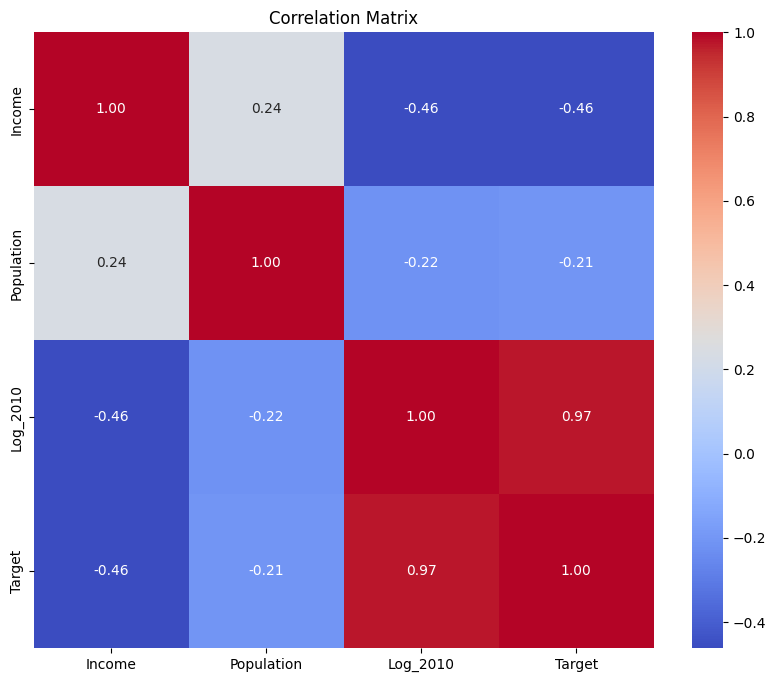

In [ ]:
# Assuming 'X_modified' is your DataFrame of features and 'y' is your target series
X_modified['Target'] = y  # Adding the target variable to your features DataFrame for correlation calculation

# Calculate the correlation matrix
correlation_matrix = X_modified.corr()

# Print the correlation values with the target
print("Correlation with the target:")
print(correlation_matrix['Target'])
print('\n')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. **Income: -0.462288**
   - There is a moderate negative correlation between 'Income' and the target variable 'Target'. This means that as 'Income' increases, the target variable 'Target' tends to decrease, and vice versa.
   -  A correlation of -0.462288 indicates that there is a somewhat noticeable inverse relationship between 'Income' and 'Target', but it is not very strong. This negative relationship could be influencing the negative coefficient seen in the linear regression model.

2. **Population: -0.208451**
   -  There is a weak negative correlation between 'Population' and the target variable 'Target'. This means that as 'Population' increases, the target variable 'Target' tends to decrease slightly, and vice versa.
   -  A correlation of -0.208451 is quite weak, indicating that 'Population' has a minimal linear relationship with the target variable. This weak relationship is consistent with the very small negative coefficient observed in the linear regression model.


**So even these results support the above statement that the CRD Deaths may have higher(noticeable) impacts with some other factors like Air Quality, Smoking or some other Health trends.**



# **Conclusion**


#### **Cluster 0**:
- **Geographic Spread**:
  - Cluster 0 is widespread across the United States, covering a significant number of counties.
  - Predominantly found in both urban and rural areas, indicating a broad distribution.

- **Notable Areas**:
  - Urban Centers: Major metropolitan areas like parts of the Northeast (e.g., New York, Pennsylvania), the Midwest (e.g., Illinois, Ohio), and the West Coast (e.g., California, Washington).
  - Rural and Suburban Areas: Present in many rural counties, especially in the Midwest, South, and parts of the West.

- **CRD Mortality Trends**:
  - The CRD mortality rate in Cluster 0 starts below zero, peaks around the year 2000, increaing slightly till 2010 and then increasing at faster pace.

- Major technically or Industrially developed regions or metropolitan areas are present. These need to implement some programs aimed to control smoking rates and environment pollution, improving healthcare access, to stabilize the rate.

#### **Cluster 1**:
- **Geographic Spread**:
  - Cluster 1 regions are less widespread compared to Cluster 0 but are prominently visible in Alaska and some specific areas across the mainland.
  - These regions often include more remote and less populated areas.

- **Notable Areas**:
  - Alaska: Significant parts of Alaska fall under Cluster 1, indicating distinct characteristics in this region.
  - Other Regions: Scattered regions in states like New Mexico, Arizona, and some parts of the Midwest.

- **CRD Mortality Trends**:
  - CRD mortality rates in Cluster 1 begin close to zero, peak slightly above zero around 2000, and then experience a sharp decline, falling well below zero by 2015.

- Between 1990 and 2010, Alaska implemented several state programs aimed at reducing smoking rates and improving healthcare access, especially in remote areas. Environment also helps them.
- These decline in rates is one of the fruits of these programs.

#### **Cluster 2**:
- **Geographic Spread**:
  - Cluster 2 is also widely distributed but has specific concentrations in the western United States and parts of the Southeast.
  - Includes both rural and suburban areas, with some presence in urban fringes.

- **Notable Areas**:
  - Western States: Significant presence in states like Colorado, Utah, and parts of California.
  - Southeast: Some counties in states like Georgia, Florida, and South Carolina fall under this cluster.

- **CRD Mortality Trends**:
  - The CRD mortality rate for Cluster 2 starts below zero, increases gradually, peaks around 2000, and then stabilizes around the zero mark, with a slight upward trend by 2015.

- These regions are going good and have to continue the decreasing trend.


**There is no major impact of Income or Population on CRD Mortality Rates. The CRD Deaths may have higher(noticeable) impacts with some other factors like Air Quality, Smoking or some other Health trends.**

# **Future Scope**

- As mentioned above Working the Air Quality Data and Smokers Data will have better insights.

- Should have used Density Of Population instead of Population.

- Since counties within the same cluster exhibit similar time series trends and seasonality in mortality rates, a **single model** can be effectively used to predict mortality rates for all counties within that cluster.

# **End**